## Machine Learning Classification

In [182]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [72]:
# Read in data from Stock notebook
apple_data = pd.read_csv('Apple_stocks_data.csv')
apple_data1 =pd.read_csv('Apple_stocks_data_test.csv')

In [201]:
#Breaking the data into indpendent and dependent variables
x = apple_data1.iloc[:, 0:230]
y = apple_data1.Stock_Change

In [83]:
# Splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [84]:
#y_train = [inner for outer in y_train for inner in outer]

## Random Forest

In [186]:
# Creating Random Forest Model
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 1245, min_samples_split= 2)
results = rfc.fit(x_train, y_train)

In [188]:
# Finds Presicision/Accuracy/Reacll/F1
acc = accuracy_score(results.predict(x_test), y_test)
pre = precision_score(y_test, results.predict(x_test))
recall = recall_score(y_test, results.predict(x_test))
f1 = f1_score(y_test, results.predict(x_test))

print(acc, pre, recall, f1)

0.503030303030303 0.40476190476190477 0.22972972972972974 0.2931034482758621


In [100]:
#GridSearch to find best parameters fr random forest

model_params = {
    'n_estimators': [250],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2, 4, 6],
    'max_features': ['sqrt','log2']}

clf = GridSearchCV(rfc, model_params, cv=5)
model = clf.fit(x, y)
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1245,
 'verbose': 0,
 'warm_start': False}


## Log Reg

In [189]:
# Train logisitic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.5454545454545454

In [192]:
# Finds Presicision/Accuracy/Reacll/F1
acc = accuracy_score(logreg.predict(x_test), y_test)
pre = precision_score(y_test, logreg.predict(x_test))
recall = recall_score(y_test, logreg.predict(x_test))
f1 = f1_score(y_test, logreg.predict(x_test))

print(acc, pre, recall, f1)

0.5454545454545454 0.4909090909090909 0.36486486486486486 0.4186046511627907


## XGB

In [194]:
# Converts test and train data to arrsy for XGB
y_train = np.array(y_train)
#y_test = [inner for outer in y_test for inner in outer]
y_test = np.array(y_test)
x_train = np.array(x_train)
x_test = np.array(x_test)

In [195]:
# Trains XGBClassifier model
boost = XGBClassifier(max_depth=4, colsample_bytree =1, min_child_weight = 7,gamma =1.5,  
                      learning_rate=.05, n_estimators=100000,
                      objective='binary:logistic', verbose = 1)
        
eval_set = [(x_train,y_train),(x_test,y_test)] 
results = boost.fit(x_train, y_train, eval_set = eval_set, verbose=True, early_stopping_rounds=100)

[17:48:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.33689	validation_1-error:0.50909
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.31250	validation_1-error:0.50909
[2]	validation_0-error:0.32012	validation_1-error:0.50909
[3]	validation_0-error:0.30488	validation_1-error:0.49091
[4]	validation_0-error:0.30945	validation_1-error:0.48485
[5]	validation_0-error:0.29726	validation_1-error:0.49697
[6]	validation_0-error:0.29268	validation_1-error:0.49091
[7]	validation_0-error:0.28354	validation_1-error:0.47879
[8]	validation_0-

In [197]:
# Finds Presicision/Accuracy/Reacll/F1
acc = accuracy_score(results.predict(x_test), y_test)
pre = precision_score(y_test, results.predict(x_test))
recall = recall_score(y_test, results.predict(x_test))
f1 = f1_score(y_test, results.predict(x_test))

print(acc, pre, recall, f1)

0.5696969696969697 0.5245901639344263 0.43243243243243246 0.4740740740740741


In [120]:
# Parameters for a gridsearch for XGB
params = {
        'min_child_weight': [5, 7],
        'gamma': [0.5, 1, 2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.7, 1.0],
        'max_depth': [3, 4, 5]
        }

In [157]:
# Gridsearch for XGB

# grid = GridSearchCV(estimator=boost, param_grid=params, scoring='roc_auc', n_jobs=4, verbose=3 )
# grid.fit(x_test, y_test)
# print('\n All results:')
# print(grid.cv_results_)
# print('\n Best estimator:')
# print(grid.best_estimator_)
# print('\n Best score:')
# print(grid.best_score_ * 2 - 1)
# print('\n Best parameters:')
# print(grid.best_params_)
# results = pd.DataFrame(grid.cv_results_)
# results.to_csv('xgb-grid-search-results-01.csv', index=False)

# y_test = grid.best_estimator_.predict_proba(test)
# results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
# results_df.to_csv('submission-grid-search-xgb-porto-01.csv', index=False)


In [163]:
# Used to find across all posts the total feature importance of a Topic
imp = boost.feature_importances_
imp[0:19]
count =0
count1 = 19
imp_list = []
for i in range(10):
    # Increments up 19 to grab topic data from 1 post at a time
    count += 19
    count1 += 19
    imp_list.append(imp[count:count1].tolist())

feature_importance_topic= np.array(ipc_list).sum(axis=0)

In [176]:
feature_importance_topic

array([0.02005253, 0.02319096, 0.02061042, 0.01438178, 0.04669887,
       0.02087799, 0.02255129, 0.02673613, 0.0136747 , 0.01981091,
       0.01452388, 0.10975269, 0.02106031, 0.10407941, 0.02526417,
       0.02937335, 0.01379687, 0.01297033, 0.02170279])

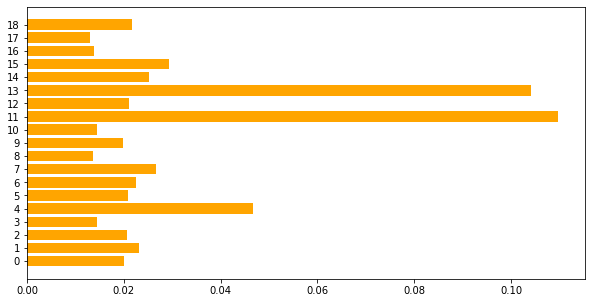

In [200]:
# Graph of feature Importance
topic = []
for i in range(19):
    topic.append(i)
plt.figure(figsize=(10,5))
plt.barh(topic,feature_importance_topic, color ='orange')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.savefig('Topic_feature_performance', dpi = 300, transparent = True)